In [64]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
!pip install faker
from faker import Faker

Faker nesnesi olusturma

In [65]:
fake = Faker('tr_TR')

1. Sabitler

In [66]:
NUM_PATIENTS = 2000
NUM_HOSPITALS = 16
NUM_DOCTORS = 500
NUM_APPOINTMENTS = 30000

2. Hastane olusturma

In [67]:
# Verilen hastane ve şehir listeleri
hospitals = [
    "Koç Üniversitesi Hastanesi",
    "Haseki Eğitim ve Araştırma Hastanesi",
    "Şişli Hamidiye Etfal Eğitim ve Araştırma Hastanesi",
    "Bakırköy Dr. Sadi Konuk Eğitim ve Araştırma Hastanesi",
    "Özel City Hospital",
    "Ankara Bilkent Şehir Hastanesi",
    "GATA Haydarpaşa Eğitim ve Araştırma Hastanesi",
    "Dışkapı Yıldırım Beyazıt Eğitim ve Araştırma Hastanesi",
    "Özel Ege Şehir Hastanesi",
    "İzmir Atatürk Eğitim ve Araştırma Hastanesi",
    "İzmir Bozyaka Eğitim ve Araştırma Hastanesi",
    "İzmir Tepecik Eğitim ve Araştırma Hastanesi",
    "Özel Acıbadem Bursa Hastanesi",
    "Bursa Şehir Hastanesi",
    "Bursa Çekirge Devlet Hastanesi",
    "Bursa Yüksek İhtisas Eğitim ve Araştırma Hastanesi"
]

cities = ["İstanbul", "Ankara", "İzmir", "Bursa"]

city_hospitals = {
    "İstanbul": [
        "Koç Üniversitesi Hastanesi",
        "Haseki Eğitim ve Araştırma Hastanesi",
        "Şişli Hamidiye Etfal Eğitim ve Araştırma Hastanesi",
        "Bakırköy Dr. Sadi Konuk Eğitim ve Araştırma Hastanesi"
    ],
    "Ankara": [
        "Özel City Hospital",
        "Ankara Bilkent Şehir Hastanesi",
        "GATA Haydarpaşa Eğitim ve Araştırma Hastanesi",
        "Dışkapı Yıldırım Beyazıt Eğitim ve Araştırma Hastanesi"
    ],
    "İzmir": [
        "Özel Ege Şehir Hastanesi",
        "İzmir Atatürk Eğitim ve Araştırma Hastanesi",
        "İzmir Bozyaka Eğitim ve Araştırma Hastanesi",
        "İzmir Tepecik Eğitim ve Araştırma Hastanesi"
    ],
    "Bursa": [
        "Özel Acıbadem Bursa Hastanesi",
        "Bursa Şehir Hastanesi",
        "Bursa Çekirge Devlet Hastanesi",
        "Bursa Yüksek İhtisas Eğitim ve Araştırma Hastanesi"
    ]
}

hospital_names = []
city_names = []

for city, hospitals_in_city in city_hospitals.items():
    for hospital in hospitals_in_city:
        hospital_names.append(hospital)
        city_names.append(city)

hospitals_df = pd.DataFrame({
    "Hospital_Name": hospital_names,
    "City": city_names
})

hospitals_df.head()

,Hospital_Name,City
0,Koç Üniversitesi Hastanesi,İstanbul
1,Haseki Eğitim ve Araştırma Hastanesi,İstanbul
2,Şişli Hamidiye Etfal Eğitim ve Araştırma Hasta...,İstanbul
3,Bakırköy Dr. Sadi Konuk Eğitim ve Araştırma Ha...,İstanbul
4,Özel City Hospital,Ankara


3. Doktor olusturma

In [68]:
specialties = ["Dahiliye","Jinekoloji","Pediatri","Göz Hastalıkları","Kulak Burun Boğaz","Cildiye",
               "Ortopodi","Kardiyoloji","Nöroloji","Psikiyatri","Üroloji","Genel Cerrahi"]
doctors = [{
    "Doctor_ID": i,
    "Doctor_Name": fake.first_name() + " " + fake.last_name(),
    "Specialty": np.random.choice(specialties, p=[0.18, 0.12, 0.12, 0.1,0.09,0.08,0.07,0.06,0.05,0.05,0.04,0.04]),
    "Hospital": random.choice(hospitals)
} for i in range(1, NUM_DOCTORS + 1)]
doctors_df = pd.DataFrame(doctors)
doctors_df.head()

,Doctor_ID,Doctor_Name,Specialty,Hospital
0,1,Kâmil Türk,Ortopodi,İzmir Tepecik Eğitim ve Araştırma Hastanesi
1,2,Yahşi Korutürk,Ortopodi,Özel City Hospital
2,3,Günver Erdoğan,Pediatri,Özel Acıbadem Bursa Hastanesi
3,4,Yazgül Sakarya,Ortopodi,İzmir Bozyaka Eğitim ve Araştırma Hastanesi
4,5,Yalın Soylu,Jinekoloji,Bakırköy Dr. Sadi Konuk Eğitim ve Araştırma Ha...


4. Hasta olusturma

In [69]:
ages = np.random.normal(loc=45, scale=15, size=NUM_PATIENTS).astype(int)
ages = np.clip(ages, 1, 90)

In [70]:
chronic_diseases = ["Diyabet", "Hipertansiyon", "Astım", "Kalp Hastalıkları", "KOAH", "Obezite", "None"]
disease_probs = [0.12, 0.2, 0.08, 0.1, 0.05, 0.1, 0.35]

In [71]:
genders = ["Male", "Female"]
gender_probs = [0.48, 0.52]

In [72]:
patients = [{
    "Patient_ID": i,
    "Age": ages[i-1],
    "Gender": np.random.choice(genders, p=gender_probs),
    "Chronic_Disease": np.random.choice(chronic_diseases, p=disease_probs)
} for i in range(1, NUM_PATIENTS + 1)]
patients_df = pd.DataFrame(patients)
patients_df.head()

,Patient_ID,Age,Gender,Chronic_Disease
0,1,27,Female,None
1,2,37,Male,Hipertansiyon
2,3,59,Male,None
3,4,63,Male,None
4,5,41,Female,Diyabet


5. Randevuları olusturma

In [73]:
statuses = ["Completed", "Cancelled", "Missed"]

In [74]:
def generate_appointment_time():
    hour = random.randint(8, 16)  # 08:00 - 16:45 arasında başlat
    minute = random.choice([0, 15, 30, 45])
    return f"{hour:02d}:{minute:02d}"

In [75]:
def generate_status_probs(patient_info, doc_info, appointment_time):
    completion_prob = 0.75
    cancellation_prob = 0.1
    missed_prob = 0.15

    if patient_info['Age'] > 60:
        completion_prob -= 0.15
        cancellation_prob += 0.05
        missed_prob += 0.1
    elif patient_info['Age'] < 25:
        completion_prob += 0.05
        missed_prob -= 0.05

    if patient_info['Chronic_Disease'] == "Diyabet":
        completion_prob += 0.04
        cancellation_prob -= 0.025
        missed_prob -= 0.015
    elif patient_info['Chronic_Disease'] == "KOAH":
        completion_prob -= 0.03
        cancellation_prob += 0.01
        missed_prob += 0.02

    if doc_info['Specialty'] == "Kardiyoloji":
        completion_prob -= 0.1
        missed_prob += 0.1
    elif doc_info['Specialty'] == "Pediatri":
        completion_prob += 0.1
        cancellation_prob -= 0.04
        missed_prob -= 0.06

    if patient_info['Gender'] == 'Female' and doc_info['Specialty'] == 'Jinekoloji':
        completion_prob += 0.05
        cancellation_prob -= 0.015
        missed_prob -= 0.035

    hour = int(appointment_time.split(":")[0])
    if hour < 12:
        completion_prob -= 0.03
        cancellation_prob -= 0.07
        missed_prob += 0.1
    else:
        completion_prob += 0.03
        missed_prob += 0.02
        completion_prob -= 0.05

    # Negatif olasılık varsa sıfıra çekelim
    completion_prob = max(0, completion_prob)
    cancellation_prob = max(0, cancellation_prob)
    missed_prob = max(0, missed_prob)

    # Eğer hepsi sıfırlandıysa, default ayarla
    if (completion_prob + cancellation_prob + missed_prob) == 0:
        completion_prob, cancellation_prob, missed_prob = 0.7, 0.2, 0.1

    # Normalizasyon (toplam 1 olsun)
    total = completion_prob + cancellation_prob + missed_prob
    completion_prob /= total
    cancellation_prob /= total
    missed_prob /= total

    return [completion_prob, cancellation_prob, missed_prob]

Doktoru Tekrar Tercih Etme

In [76]:
# Hasta bazlı tercih edilen doktorları saklayacak bir sözlük
patient_preferred_doctors = {}

appointments = []
for i in range(1, NUM_APPOINTMENTS + 1):
    doc_id = random.randint(1, NUM_DOCTORS)
    doc_info = doctors_df.loc[doctors_df['Doctor_ID'] == doc_id].iloc[0]

    patient_id = random.randint(1, NUM_PATIENTS)
    # Hastaların ve doktorların etkileşimlerine dayalı randevu durumu atama
    patient_info = patients_df.loc[patients_df['Patient_ID'] == random.randint(1, NUM_PATIENTS)].iloc[0]

    time = generate_appointment_time()
    
    status_prob = generate_status_probs(patient_info, doc_info, time)

    status = np.random.choice(statuses, p=status_prob)

    choice = "---"  # Başlangıçta boş

    if status == "Completed":
        # Önceden bu doktoru tercih etmiş mi?
        previous_choice = patient_preferred_doctors.get(patient_id, set())

        if doc_id in previous_choice:
            # Daha önce bu doktoru tercih ettiyse %90 ihtimalle "Yes"
            if random.random() < 0.9:
                choice = "Yes"
            else:
                choice = "No"
        else:
            # İlk defa bu doktora gidiyorsa %50 ihtimalle "Yes"
            if random.random() < 0.5:
                choice = "Yes"
            else:
                choice = "No"

        # Eğer bu randevuda "Yes" dediyse bu doktoru tercih listesine ekle
        if choice == "Yes":
            if patient_id in patient_preferred_doctors:
                patient_preferred_doctors[patient_id].add(doc_id)
            else:
                patient_preferred_doctors[patient_id] = {doc_id}

    choice_num = {"Yes": 1, "No": 0, "---": 2}[choice]

    appointments.append({
        "Appointment_ID": i,
        "Patient_ID": random.randint(1, NUM_PATIENTS),
        "Doctor_ID": doc_info['Doctor_ID'],
        "Hospital": doc_info['Hospital'],
        "Date": fake.date_between(start_date="-1y", end_date="today"),
        "Time": time,
        "Status": status,
        "Doctor_Choice": choice,
        "Doctor_Choice_Num" : choice_num
    })

appointments_df = pd.DataFrame(appointments)
appointments_df.head()

,Appointment_ID,Patient_ID,Doctor_ID,Hospital,Date,Time,Status,Doctor_Choice,Doctor_Choice_Num
0,1,1998,313,İzmir Tepecik Eğitim ve Araştırma Hastanesi,2024-08-01,10:00,Completed,Yes,1
1,2,527,229,Özel Acıbadem Bursa Hastanesi,2024-12-04,12:45,Cancelled,---,2
2,3,325,93,Özel Ege Şehir Hastanesi,2024-12-26,12:15,Completed,Yes,1
3,4,1797,420,Bursa Çekirge Devlet Hastanesi,2024-11-12,09:30,Missed,---,2
4,5,407,179,Dışkapı Yıldırım Beyazıt Eğitim ve Araştırma H...,2024-10-09,15:45,Completed,Yes,1


6. Kronik hastalik dagilim grafigi

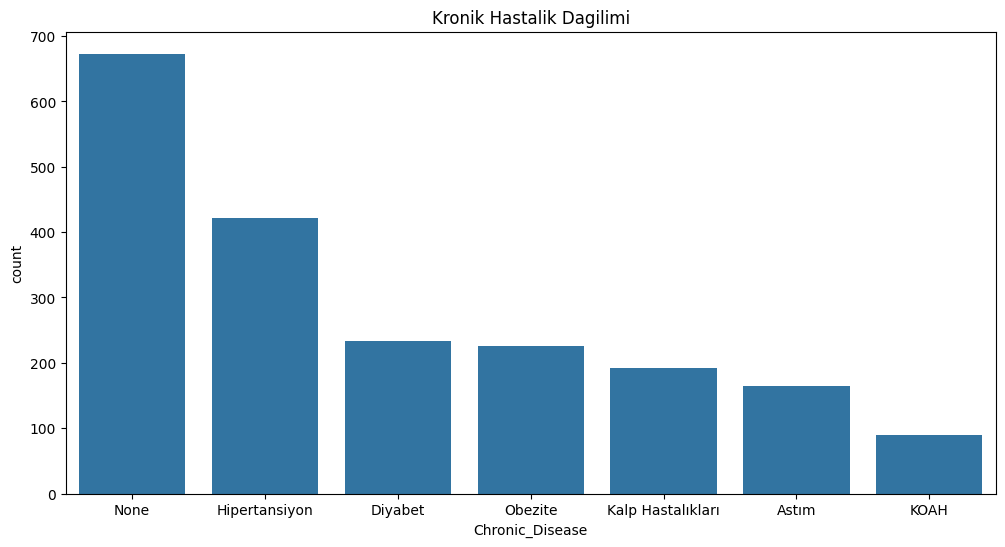

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(data=patients_df, x="Chronic_Disease", order=patients_df["Chronic_Disease"].value_counts().index)
plt.title("Kronik Hastalik Dagilimi")
plt.show()

7. Randevu durumu dagilim grafigi

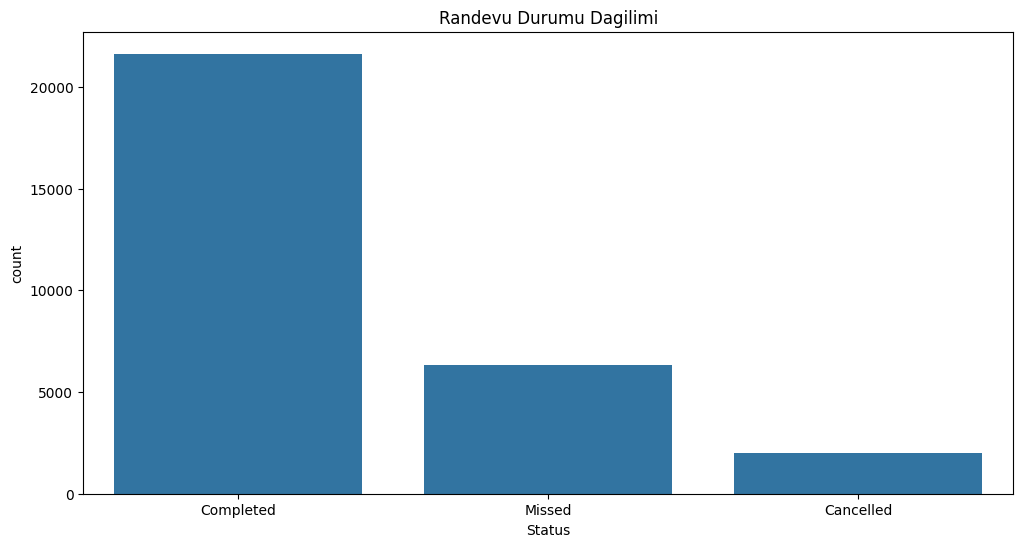

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(data=appointments_df, x="Status", order=appointments_df["Status"].value_counts().index)
plt.title("Randevu Durumu Dagilimi")
plt.show()

8. Hasta yas dagilimi grafigi

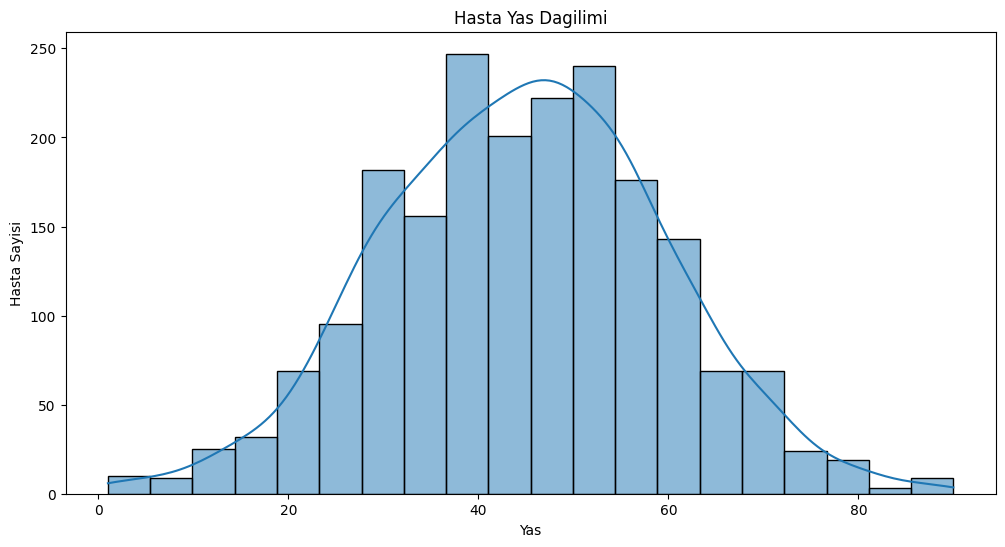

In [79]:
plt.figure(figsize=(12, 6))
sns.histplot(patients_df["Age"], bins=20, kde=True)
plt.title("Hasta Yas Dagilimi")
plt.xlabel("Yas")
plt.ylabel("Hasta Sayisi")
plt.show()

9. En Çok Randevu Alan Branşlar ve Doktorlar

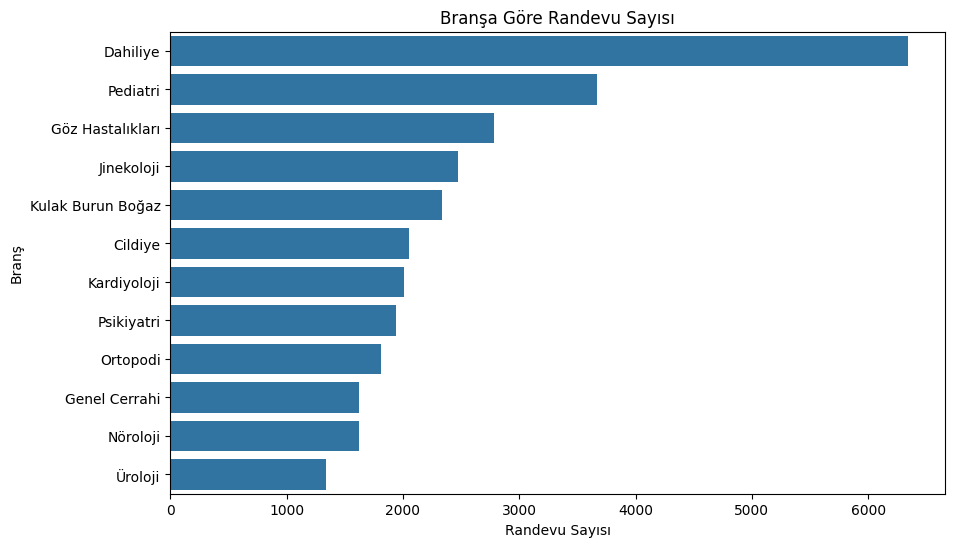

In [80]:
merged_df = appointments_df.merge(doctors_df, on="Doctor_ID")
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, y="Specialty", order=merged_df["Specialty"].value_counts().index)
plt.title("Branşa Göre Randevu Sayısı")
plt.xlabel("Randevu Sayısı")
plt.ylabel("Branş")
plt.show()

In [81]:
top_docs = merged_df["Doctor_Name"].value_counts().head(10)
print("En Çok Randevu Alan 10 Doktor:\n", top_docs)

En Çok Randevu Alan 10 Doktor:
 Doctor_Name
Huzuri Türk           83
Sidar Fırat           83
Ayyaruk Kısakürek     83
Beste Alemdar         82
Melûl Akar            81
Çelikkan İhsanoğlu    79
Aykutalp Türk         78
Veis İhsanoğlu        77
Baydu Türk            75
Omaca Dumanlı         75
Name: count, dtype: int64


10. Birden fazla randevusu olan hasta bilgisi

In [82]:
repeat_patients = appointments_df["Patient_ID"].value_counts()
repeat_count = (repeat_patients > 1).sum()
print(f"Birden fazla randevusu olan hasta sayısı: {repeat_count}")

Birden fazla randevusu olan hasta sayısı: 2000


11. CSV olarak kaydetme

In [83]:
patients_df.to_csv("patients.csv", index=False, encoding='utf-8-sig')
doctors_df.to_csv("doctors.csv", index=False, encoding='utf-8-sig')
appointments_df.to_csv("appointments.csv", index=False, encoding='utf-8-sig')

In [84]:
print("Ornek veri setleri olusturuldu: patients.csv, doctors.csv, appointments.csv")

Ornek veri setleri olusturuldu: patients.csv, doctors.csv, appointments.csv
